Código compartido:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Funciones de prueba

In [2]:
#minimizacion de la funcion
#funciones de prueba
def f0(x):
  # x => [-10,10]
  return 3*x[0]**4 + (x[0]-1)**2# x[0]**2 #3*x[0]**4 + (x[0]-1)**2

def f1(x):
  # x1,x2 => [-5,10]
  y = (1.5 - x[0]*(1.0-x[1]))**2 + (2.25 - x[0]*(1.0-x[1]**2))**2 + (2.625 - x[0]*(1.0-x[1]**3))**2
  return y

def f2(x):
  # x1,x2,x3,x4 => [-20,20]
  y = (10.0*(x[1]-x[0]**2))**2 + (1.0-x[0])**2 + 90.0*(x[3]-x[2]**2)**2 + (1.0-x[2])**2 + 10.0*(x[1]+x[3]-2.0)**2 + 0.1*(x[1]-x[3])**2
  return y

#def FP1():

Recocido simulado (versión compartida)

[-1.34725551]
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3472555149045249] FUNCTION VALUE ==>  15.39334441110185  Temp:  30.0
X:  [-1.3425892808411388] FUNCTION VALUE ==>  15.235240536627796  Temp:  27.5
X:  [-1.3443854087083908] FUNCTION VALUE ==>  15.29592496253956  Temp:  27.5
X:  [-1.343027871739184] FUNCTION VALUE ==>  15.2500389433393

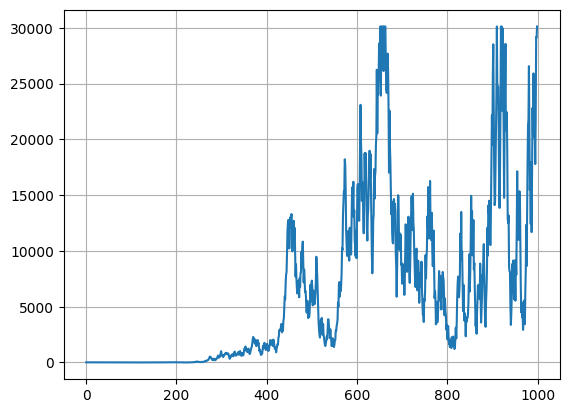

In [3]:
def randSolution(interval, xx):
  limInf, limSup = interval
  xx = (limSup - limInf)* np.random.random_sample((len(xx))) + limInf
  return xx

def clip(x, interval):
    #clip x value to interval
    limInf, limSup = interval
    return max(min(x, limSup), limInf)
'''
    if(x < limInf)
       x = limInf
    else if(x> limSup)
       x = limSup
'''
#esta funcion puede variar
def neighborSolution(x, interval, fraction):
  yy = []
  amplitude = (max(interval) - min(interval)) * fraction / 10.0
  delta = (-amplitude/2.) + amplitude * np.random.random() # posible modificacion

  for i in range(len(x)):
    #if np.random.random() <= 0.5:
      yy.append(clip(x[i] + delta, interval)) #la funcion clip verifica que me mantenga dentro de los limites de las variables
    #else:
      #yy.append(clip(x[i] - delta, interval))

  return yy

def acceptanceProbability(x, y, function, temp):
  if temp == 0:
    temp = 0.0001
  fx = function(x)
  fy = function(y)
  if fy < fx: #elitismo, si fy es mejor a fx reemplaza
    return True
  #cuando temp < 0 ==> p > 0
  p = np.exp(-(fy - fx)/temp) #se calcula la probabilidad con base en la ecuacion de Boltzman
  p = clip(p,(0,1))
  if np.random.random() < p: # probabilidad de que una peor solucion reemplace a una mejor solucion
    return True
  else:
    return False


def decreaseTemp1(beta, temp): # implementar las otras propuestas
   return temp-beta #lineal

def plotConvergence(iterations, states):
  plot(iterations, states)
  plt.grid()

def simulatedAnnealing(temp, maxSteps1, maxSteps2, numVar, interval, function):
  x = [0.0] * numVar
  x = randSolution(interval, x)#solucion inicial
  print(x)
  states = [] #soluciones que encuentra
  temps = [] #niveles de temperatura
  beta = 2.5 # se pueden probar otros valores
  for step in range(maxSteps1):
    fraction = step / float(maxSteps1)
    for j in range(maxSteps2):
      y = neighborSolution(x, interval, fraction)# vecindario
      #print("neighborSolution: ", y)
      if acceptanceProbability(x, y, function, temp):
        #print("Updating x value")
        x = y

      state = function(x)
      print("X: ", x, "FUNCTION VALUE ==> ", state, " Temp: ", temp)
      #states.append([x, function(x)])
      states.append(state)
      temps.append(temp)
    temp = decreaseTemp1(beta, temp) #modificacion de la temp
  return x, function(x), states, temps


temp=30.0 #probar otros valores
maxSteps1=100
maxSteps2=10
function = f0 #f1 # fP1
numVar = 1 #2
interval = (-10,10 )#(-5, 10) #limite inferior y superior de la funcion a optimizar

solution = simulatedAnnealing(temp, maxSteps1, maxSteps2, numVar, interval, function)
print(solution)


iterations = range(maxSteps1*maxSteps2)
plotConvergence(iterations, solution[2])
#plotConvergence(iterations, solution[3])